In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_image_files_path = "/content/drive/MyDrive/10_MON_AN/TRAIN"
valid_image_files_path = "/content/drive/MyDrive/10_MON_AN/VALIDATE"
label=['Banh bot loc','Banh canh ','Banh chung','Banh gio','Banh mi','Banh tet','Banh xeo','Bun mam','Bun thit nuong','Canh chua']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)


In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(250, 250),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(250, 250),               
    class_mode='categorical')


Found 5889 images belonging to 10 classes.
Found 837 images belonging to 10 classes.


In [ ]:
model=tf.keras.models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(250,250,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
model.add(Flatten()) 

model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax)) 

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])
history=model.fit(
    train_generator,
    steps_per_epoch=3,
    epochs=150,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=3)

Epoch 1/150
3/3 [==============================] - 59s 20s/step - loss: 2.3117 - acc: 0.1771 - val_loss: 2.3118 - val_acc: 0.0833
Epoch 2/150
3/3 [==============================] - 97s 40s/step - loss: 2.2321 - acc: 0.1354 - val_loss: 2.3872 - val_acc: 0.0938
Epoch 3/150
3/3 [==============================] - 100s 41s/step - loss: 2.2306 - acc: 0.1250 - val_loss: 2.3187 - val_acc: 0.0938
Epoch 4/150
3/3 [==============================] - 91s 37s/step - loss: 2.2395 - acc: 0.1979 - val_loss: 2.2753 - val_acc: 0.1458
Epoch 5/150
3/3 [==============================] - 94s 37s/step - loss: 2.2271 - acc: 0.1771 - val_loss: 2.3054 - val_acc: 0.1146
Epoch 6/150
3/3 [==============================] - 76s 29s/step - loss: 2.2375 - acc: 0.1562 - val_loss: 2.2416 - val_acc: 0.1562
Epoch 7/150
3/3 [==============================] - 67s 26s/step - loss: 2.1585 - acc: 0.2188 - val_loss: 2.2758 - val_acc: 0.1875
Epoch 8/150
3/3 [==============================] - 81s 30s/step - loss: 2.1378 - acc: 0.2

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


3/3 [==============================] - 33s 12s/step - loss: 2.1876 - acc: 0.2292 - val_loss: 2.2896 - val_acc: 0.2708
Epoch 26/150
3/3 [==============================] - 38s 14s/step - loss: 2.1791 - acc: 0.2292 - val_loss: 2.3684 - val_acc: 0.1042
Epoch 27/150
3/3 [==============================] - 27s 11s/step - loss: 2.0050 - acc: 0.3021 - val_loss: 2.2769 - val_acc: 0.2500
Epoch 28/150
3/3 [==============================] - 32s 11s/step - loss: 2.0188 - acc: 0.3021 - val_loss: 2.4110 - val_acc: 0.2083
Epoch 29/150
3/3 [==============================] - 33s 12s/step - loss: 2.2278 - acc: 0.2396 - val_loss: 2.1789 - val_acc: 0.2188
Epoch 30/150
3/3 [==============================] - 30s 10s/step - loss: 2.1236 - acc: 0.2812 - val_loss: 2.3552 - val_acc: 0.0938
Epoch 31/150
3/3 [==============================] - 37s 13s/step - loss: 2.0118 - acc: 0.2396 - val_loss: 2.3265 - val_acc: 0.0625
Epoch 32/150
3/3 [==============================] - 28s 9s/step - loss: 2.0366 - acc: 0.2604 - v

Saving 24.jpg to 24.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Giá trị dự đoán:  Banh tet


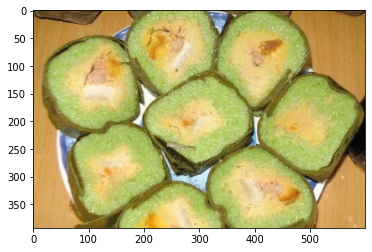

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving 43.jpg to 43.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Giá trị dự đoán:  Canh chua


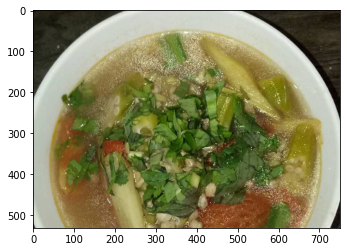

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving 17.jpg to 17.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Banh bot loc


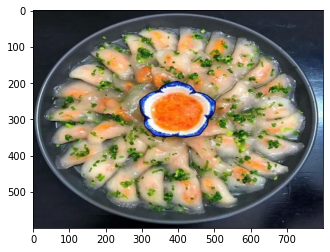

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])